# NBA Games Dataset 


In [ ]:
#Format - Comma Seperated Values (.csv)
#Source - National Basketball Association (NBA) Dataset from the website Kaggle- https://www.kaggle.com/nathanlauga/nba-games?select=games.csv
#Size - 21 columns and 24,000 values 
#Categories - Dates, Types, Strings, Numbers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import pandas as pd

x = pd.read_csv("games.csv") #to read the dataset into python
df = x.drop(["TEAM_ID_away", "TEAM_ID_home"] , axis=1) # dropping duplicate columns
df.head() #df.head() used to print 5 values of the dataset


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,120.0,0.557,0.684,0.429,26.0,45.0,95.0,0.402,0.633,0.091,22.0,40.0,1
1,2021-05-26,42000132,Final,1610612752,1610612737,2020,101.0,0.383,0.739,0.364,15.0,54.0,92.0,0.369,0.818,0.273,17.0,41.0,1
2,2021-05-26,42000142,Final,1610612762,1610612763,2020,141.0,0.544,0.774,0.487,28.0,42.0,129.0,0.541,0.763,0.348,20.0,33.0,1
3,2021-05-25,42000112,Final,1610612751,1610612738,2020,130.0,0.523,0.955,0.447,31.0,46.0,108.0,0.424,0.783,0.353,23.0,43.0,1
4,2021-05-25,42000152,Final,1610612756,1610612747,2020,102.0,0.465,0.933,0.308,21.0,31.0,109.0,0.450,0.871,0.303,24.0,39.0,0


# HEATMAP

<AxesSubplot:xlabel='HOME_TEAM_ID', ylabel='SEASON'>

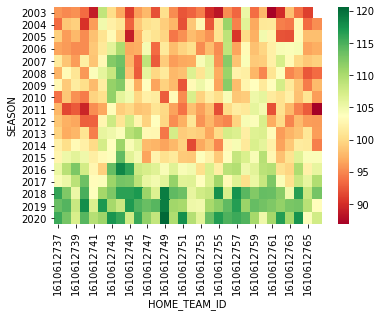

In [8]:
#Below is heatmap denoting the points scored by home team seasonwise.
# the denser the shade, higher the points scored by that team in its home.

df_heatmap = df[["SEASON", "PTS_home", "HOME_TEAM_ID"]] #heatmap of 3 attributes

heatmap1_data = pd.pivot_table(df_heatmap, values="PTS_home", index=['SEASON'],columns='HOME_TEAM_ID') #pivot table makes a table of thes 3 attributes
sns.heatmap(heatmap1_data, cmap="RdYlGn") #cmap is used for color grade also use: RdYlGn

#Conclusion - 
#The heatmap below shows the representation of different values in a matrix using the color coding sytem
#The more darker the shade, the more points scored by that team on that particular season.   
#Therefore, it can be seen that the home team ID 1610612749 in the season 2020 has scored the most number of points by having a color shade of 120 from color gradient. 




# PIE PLOT 

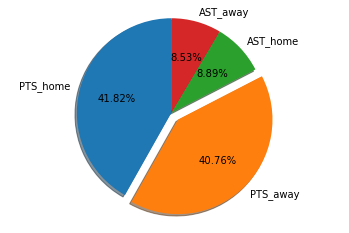

In [9]:

#below pie chart shows the comparison of data of points and assists performed by home and away team.

pie_set = df.loc[df['GAME_DATE_EST'] == '2021-05-25']
#select only those rows where the date is 2021-05-25
labels = 'PTS_home', 'PTS_away', 'AST_home', 'AST_away'
# below variables store the total sum of scores and assists made on that day
w = pie_set["PTS_home"].sum() 
x = pie_set["PTS_away"].sum()
y = pie_set["AST_home"].sum()
z = pie_set["AST_away"].sum()
sizes = [w, x, y, z] #stores the vriables w,x,y,x in an array
explode = (0, 0.1, 0, 0) # decides the outwardness in a pie chart

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90) #all arguements decides how the pie chart should look
ax1.axis('equal') # ensures that the pie chart is a circle


plt.show()

#Conclusion 
#It shows the comparison of data of points on the particular date (2021-05-25). Therefore, by looking at the pie chart
#it shows that the point home team has scored the maximum number of points and assists on that day since the percenatge 
#is higher (41.82% and 8.89%) as comapred to the away team.


# SCATTER PLOT 

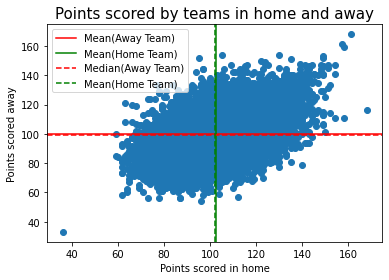

In [10]:

# below is shown a scatter plot denoting the scattering of points scored by home and away team.
home = df["PTS_home"]
away = df["PTS_away"]

plt.xlabel("Points scored in home") #x axis label
plt.ylabel("Points scored away") #y axis label
plt.title("Points scored by teams in home and away",fontsize=15)#give a title for the scatter plot using plt.title
plt.scatter(home, away) #scatter plot showing home team and away team

# below variables contains the mean and meadian values of home and away team
x = home.mean()
y = away.mean()
z = home.median()
w = away.median()

plt.axhline(y, color='r', linestyle='-', label="Mean(Away Team)") #axhline plots an horizontal line
plt.axvline(x, color='g', linestyle='-', label="Mean(Home Team)") #axvline plots an vertical line

plt.axhline(w, color='r', linestyle='--', label="Median(Away Team)")
plt.axvline(z, color='g', linestyle='--', label="Mean(Home Team)")

plt.legend() # this shows the labels on the plot itself.
plt.show()

#conclusion 
#The scatter plot below indicates a positve correlation between "points scored by home team" and "points scored by outside team"
#it shows that there is not much of a differnece between the points scored by both the teams.


In [11]:
df['GAME_DATE_EST'] = pd.to_datetime(df['GAME_DATE_EST']) #convert the column to a datetime

df['Year'] = df['GAME_DATE_EST'].dt.year #adds another column for year
year_count =  df.groupby('Year')['Year'].count() #counts the rows for each year

home_team_win = df.groupby('Year')['HOME_TEAM_WINS'].sum().to_numpy() #matches won by home team every year
outsider_team_win = (year_count - home_team_win).to_numpy()  #matches won by outsider team every year



# BAR PLOT 

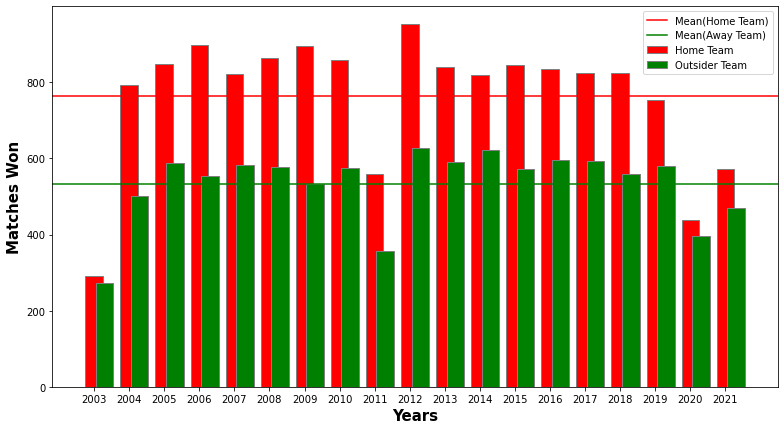

In [12]:

#Below plot denoted the Matches won by home and away team yearwise in all of their NBA History.
#We have covnerted date column in datetime format and extrarcted the year to make another column.

fig = plt.figure(figsize=(13,7)) # set canvas size

n=19
r = np.arange(n) #use the np.arrange function to equally divide the number of years ie. from 2003-2021
width = 0.5

years = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
X_axis = np.arange(len(years))

plt.bar(X_axis, home_team_win, color ='r', edgecolor ='grey', width= 0.5, label ='Home Team') #classify the x axis( home team) on the basis these attributes
plt.bar(X_axis + 0.3, outsider_team_win, color ='g', edgecolor ='grey', width= 0.5, label ='Outsider Team') #classify the y axis(outsider team) on the basis of these attributes

 
plt.xlabel('Years', fontweight ='bold', fontsize = 15)
plt.ylabel('Matches Won', fontweight ='bold', fontsize = 15)
plt.xticks(X_axis, years) # how the values on the x axis should be adjusted

mean_away = outsider_team_win.mean() #mean matches won by outsider team
mean_home =  home_team_win.mean() #mean matches won by home team

#below func plots a horizontal line for mean values of hoem and awaty team.
plt.axhline(mean_home, color='r', linestyle='-', label="Mean(Home Team)")
plt.axhline(mean_away, color='g', linestyle='-', label="Mean(Away Team)")
plt.legend() #legend is used to show the upper right column which distinguishes the data by color
plt.show()

#Conclusion - 
#the below bar graph shows the matches won by the home team (red) and the outsider team(green) over different years (2003-2021)
#from the graph it can be seen that the the home team has scored the most number of points during all those years as compared to the outsider team.


# DENSITY PLOT

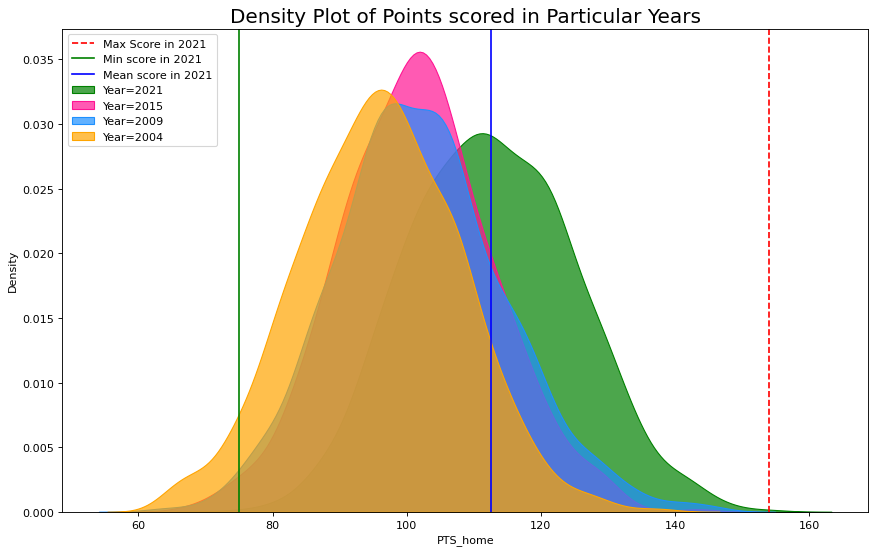

In [14]:
#Below is a density plot which shows the density of points scored for particular years i.e. 2021, 2015, 2009, 2004
# x axis contains PTS_home while y axis contains the density. if the density is highest at a certain PTS_HOME point, it means that most of the points scored lies in that range.

plt.figure(figsize=(13,8), dpi= 80)
sns.kdeplot(df.loc[df['Year'] == 2021, "PTS_home"], shade=True, color="g", label="Year=2021", alpha=.7)
sns.kdeplot(df.loc[df['Year'] == 2015, "PTS_home"], shade=True, color="deeppink", label="Year=2015", alpha=.7)
sns.kdeplot(df.loc[df['Year'] == 2009, "PTS_home"], shade=True, color="dodgerblue", label="Year=2009", alpha=.7)
sns.kdeplot(df.loc[df['Year'] == 2004, "PTS_home"], shade=True, color="orange", label="Year=2004", alpha=.7)

max_score_2021 = df.loc[df['Year'] == 2021, "PTS_home"].max()
min_score_2021 = df.loc[df['Year'] == 2021, "PTS_home"].min()
mean_score_2021 = df.loc[df['Year'] == 2021, "PTS_home"].mean()

plt.axvline(max_score_2021, color='r', linestyle='--', label="Max Score in 2021")
plt.axvline(min_score_2021, color='g', linestyle='-', label="Min score in 2021")
plt.axvline(mean_score_2021, color='b', linestyle='-', label="Mean score in 2021")

# Decoration
plt.title('Density Plot of Points scored in Particular Years', fontsize=18)
plt.legend() #upper left column
plt.show()

#Conclusion 
#By looking at the density plot, it can be assumed that the home team has scored the maximum number of points during the year 2015 
#since the density of the home team is at the highest (0.035) during the year 2015 (pink shaded region). 